# Importing Libraries

In [1]:
import cv2
import numpy as np
from keras.models import model_from_json
import matplotlib.pyplot as plt

In [2]:
emotion_dict = {0: "Angry", 1: "Disgusted", 2: "Fearful", 3: "Happy", 4: "Neutral", 5: "Sad", 6: "Surprised"}

# Loading the Model

In [3]:
# load json and create model
json_file = open('model/emotion_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
emotion_model = model_from_json(loaded_model_json)

# Load weights into new model

In [4]:
# load weights into new model
emotion_model.load_weights("model/emotion_model.h5")
print("Loaded model from disk")

Loaded model from disk


# Testing the Model

In [5]:
# cap = cv2.VideoCapture("pexels-gabby-k-5273028 (2160p).mp4")
cap = cv2.VideoCapture(0)
while True:
    # Find haar cascade to draw bounding box around face
    ret, frame = cap.read()
    frame = cv2.resize(frame, (1280, 720))
    if not ret:
        break
    face_detector = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # detect faces available on camera
    num_faces = face_detector.detectMultiScale(gray_frame, scaleFactor=1.3, minNeighbors=5)

    # take each face available on the camera and Preprocess it
    for (x, y, w, h) in num_faces:
        cv2.rectangle(frame, (x, y-50), (x+w, y+h+10), (0, 255, 0), 4)
        roi_gray_frame = gray_frame[y:y + h, x:x + w]
        cropped_img = np.expand_dims(np.expand_dims(cv2.resize(roi_gray_frame, (48, 48)), -1), 0)

        # predict the emotions
        emotion_prediction = emotion_model.predict(cropped_img)
        maxindex = int(np.argmax(emotion_prediction))
        cv2.putText(frame, emotion_dict[maxindex], (x+5, y-20), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2, cv2.LINE_AA)

    cv2.imshow('Emotion Detection', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - 0s 57ms/step


KeyboardInterrupt: 

In [16]:
frame = cv2.imread('WhatsApp Image 2023-07-12 at 4.41.05 PM.jpeg')

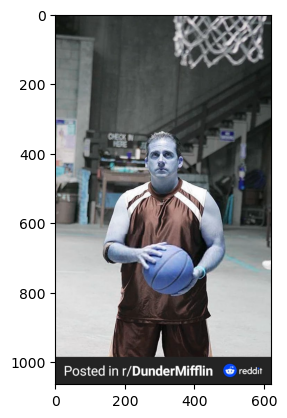

In [17]:
plt.imshow(frame)

In [18]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [19]:
gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)

In [20]:
faces = face_cascade.detectMultiScale(gray,1.1,4)

for x,y,w,h in faces :
    
    roi_gray = gray[y:y+h,x:x+w]
    
    roi_color = frame[y:y+h,x:x+w]
    
    cv2.rectangle(gray,(x,y),(x+w,y+h),(255,0,0),2)
    
    faces = face_cascade.detectMultiScale(roi_gray)
    
    if len(faces) == 0 :
        
        print("Faces not detected ")
        
    else :
        
        for (ex,ey,ew,eh) in faces :
            
            face_roi = roi_gray[ey : ey+eh,ex:ex+ew]

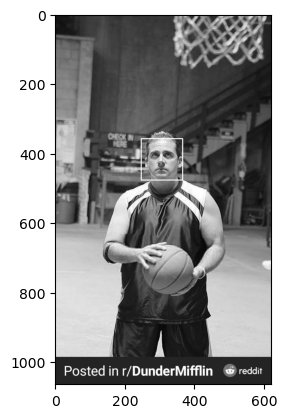

In [21]:
plt.imshow(cv2.cvtColor(gray,cv2.COLOR_BGR2RGB))

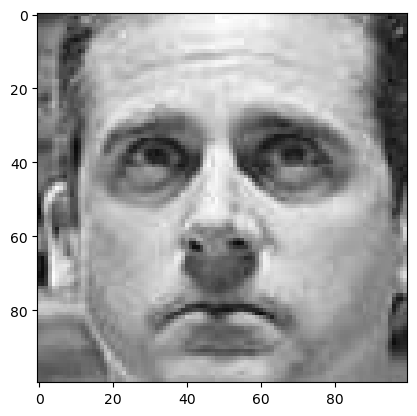

In [22]:
plt.imshow(cv2.cvtColor(face_roi,cv2.COLOR_BGR2RGB))

In [23]:
cropped_img = np.expand_dims(np.expand_dims(cv2.resize(face_roi, (48, 48)), -1), 0)

# predict the emotions
emotion_prediction = emotion_model.predict(cropped_img)
maxindex = int(np.argmax(emotion_prediction))
print(maxindex)

1/1 [==============================] - 0s 32ms/step
2
